In [17]:
from mcnpy.endf.read_endf import read_endf
from mcnpy.utils import configure_endf_debug_logging
from mcnpy.cov.mf34cov_heatmap import plot_mf34_uncertainties, plot_mf34_covariance_heatmap
import logging
from mcnpy.cov.mg_mf34_covmat import MGMF34CovMat
from mcnpy.energy_grids import SCALE56

# === DEBUG LOGGING SETUP ===
modules = [
    'mcnpy.endf.parsers.parse_mf34',
    ]
configure_endf_debug_logging(enable=True, level=logging.DEBUG, modules=modules)

<RootLogger root (WARNING)>

In [2]:
#jendl_Fe56 = '/share_snc/snc/JuanMonleon/n-26056_jendl.txt'
#jendl_endf = read_endf(jendl_Fe56)

In [ ]:
jeff_Fe56 = '/share_snc/snc/JuanMonleon/jeff40_with_MF4_from_jeff33/26-Fe-56g.txt'
jeff_endf = read_endf(jeff_Fe56)

cov = jeff_endf.mf[34].to_ang_covmat()

/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing MF34 with 339 lines
[DEBUG] mcnpy.endf.parsers.parse_mf34: Found MT sections: [2]
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing MT2 with 339 lines
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing MF34 MT2 with ZA=26056, AWR=55.4544, LTT=1, NMT1=1
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing subsection 1/1 with MAT1=0, MT1=2, NL=6, NL1=6
[DEBUG] mcnpy.endf.parsers.parse_mf34: Processing 21 sub-subsections for this subsection
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing sub-subsection 1/21 with L=1, L1=1, LCT=0, NI=3
[DEBUG] mcnpy.endf.parsers.parse_mf34: Parsing LIST record 1/3 with LS=1, LB=5, NT=66, NE=11
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 processing: LS=1, NE=11
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 symmetric matrix: 10x10, upper triangle = 55 elements
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 total values to read: 11 (energies) + 55 (matrix) = 66
[DEBUG] mcnpy.endf.parsers.parse_mf34: LB=5 read 66 total values
[DEBUG

In [ ]:
jeff_endf.mf[4].mt[2].get_interpolation_summary()

'Mixed Representation (LTT=3) Interpolation Summary:\n============================================================\n\nLegendre Coefficients Section:\n-----------------------------------\n  Energy range: 1.000e-05 to 4.500e+07 eV\n  Interpolation: linear-linear\n\nTabulated Distributions Section:\n-----------------------------------\n  Energy range: 4.500e+07 to 1.500e+08 eV\n  Interpolation: linear-linear\n\nAngular Interpolation Schemes:\n------------------------------\n  Angular distributions use:\n    - linear-linear'

In [ ]:
cov.summary()

,isotope_row,MT_row,L_row,isotope_col,MT_col,L_col,NE,is_relative,frame
0,26056,2,1,26056,2,1,43,True,same-as-MF4
1,26056,2,1,26056,2,2,16,True,same-as-MF4
2,26056,2,1,26056,2,3,16,True,same-as-MF4
3,26056,2,1,26056,2,4,16,True,same-as-MF4
4,26056,2,1,26056,2,5,13,True,same-as-MF4
5,26056,2,1,26056,2,6,13,True,same-as-MF4
6,26056,2,2,26056,2,2,43,True,same-as-MF4
7,26056,2,2,26056,2,3,16,True,same-as-MF4
8,26056,2,2,26056,2,4,16,True,same-as-MF4
9,26056,2,2,26056,2,5,13,True,same-as-MF4


In [ ]:
print(cov.describe(1))

Matrix 1:
  Reaction: 26056 MT2 (L=1) ↔ 26056 MT2 (L=2)
  Shape: (15, 15), Energy grid: 16 points (15 intervals)
  Type: Relative
  Reference frame: same-as-MF4


In [ ]:
cov.to_dataframe()   

,ISO_H,REAC_H,L_H,ISO_V,REAC_V,L_V,ENE,STD
0,26056,2,1,26056,2,1,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.09072, 0.01232, 0.01232, 0.01232, 0.01232,..."
1,26056,2,1,26056,2,2,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,26056,2,1,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,26056,2,1,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,26056,2,1,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,26056,2,1,26056,2,6,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,26056,2,2,26056,2,2,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.07785, 0.006561, 0.006561, 0.006561, 0.006..."
7,26056,2,2,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,26056,2,2,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,26056,2,2,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
#cov = jendl_endf.mf[34].to_ang_covmat()

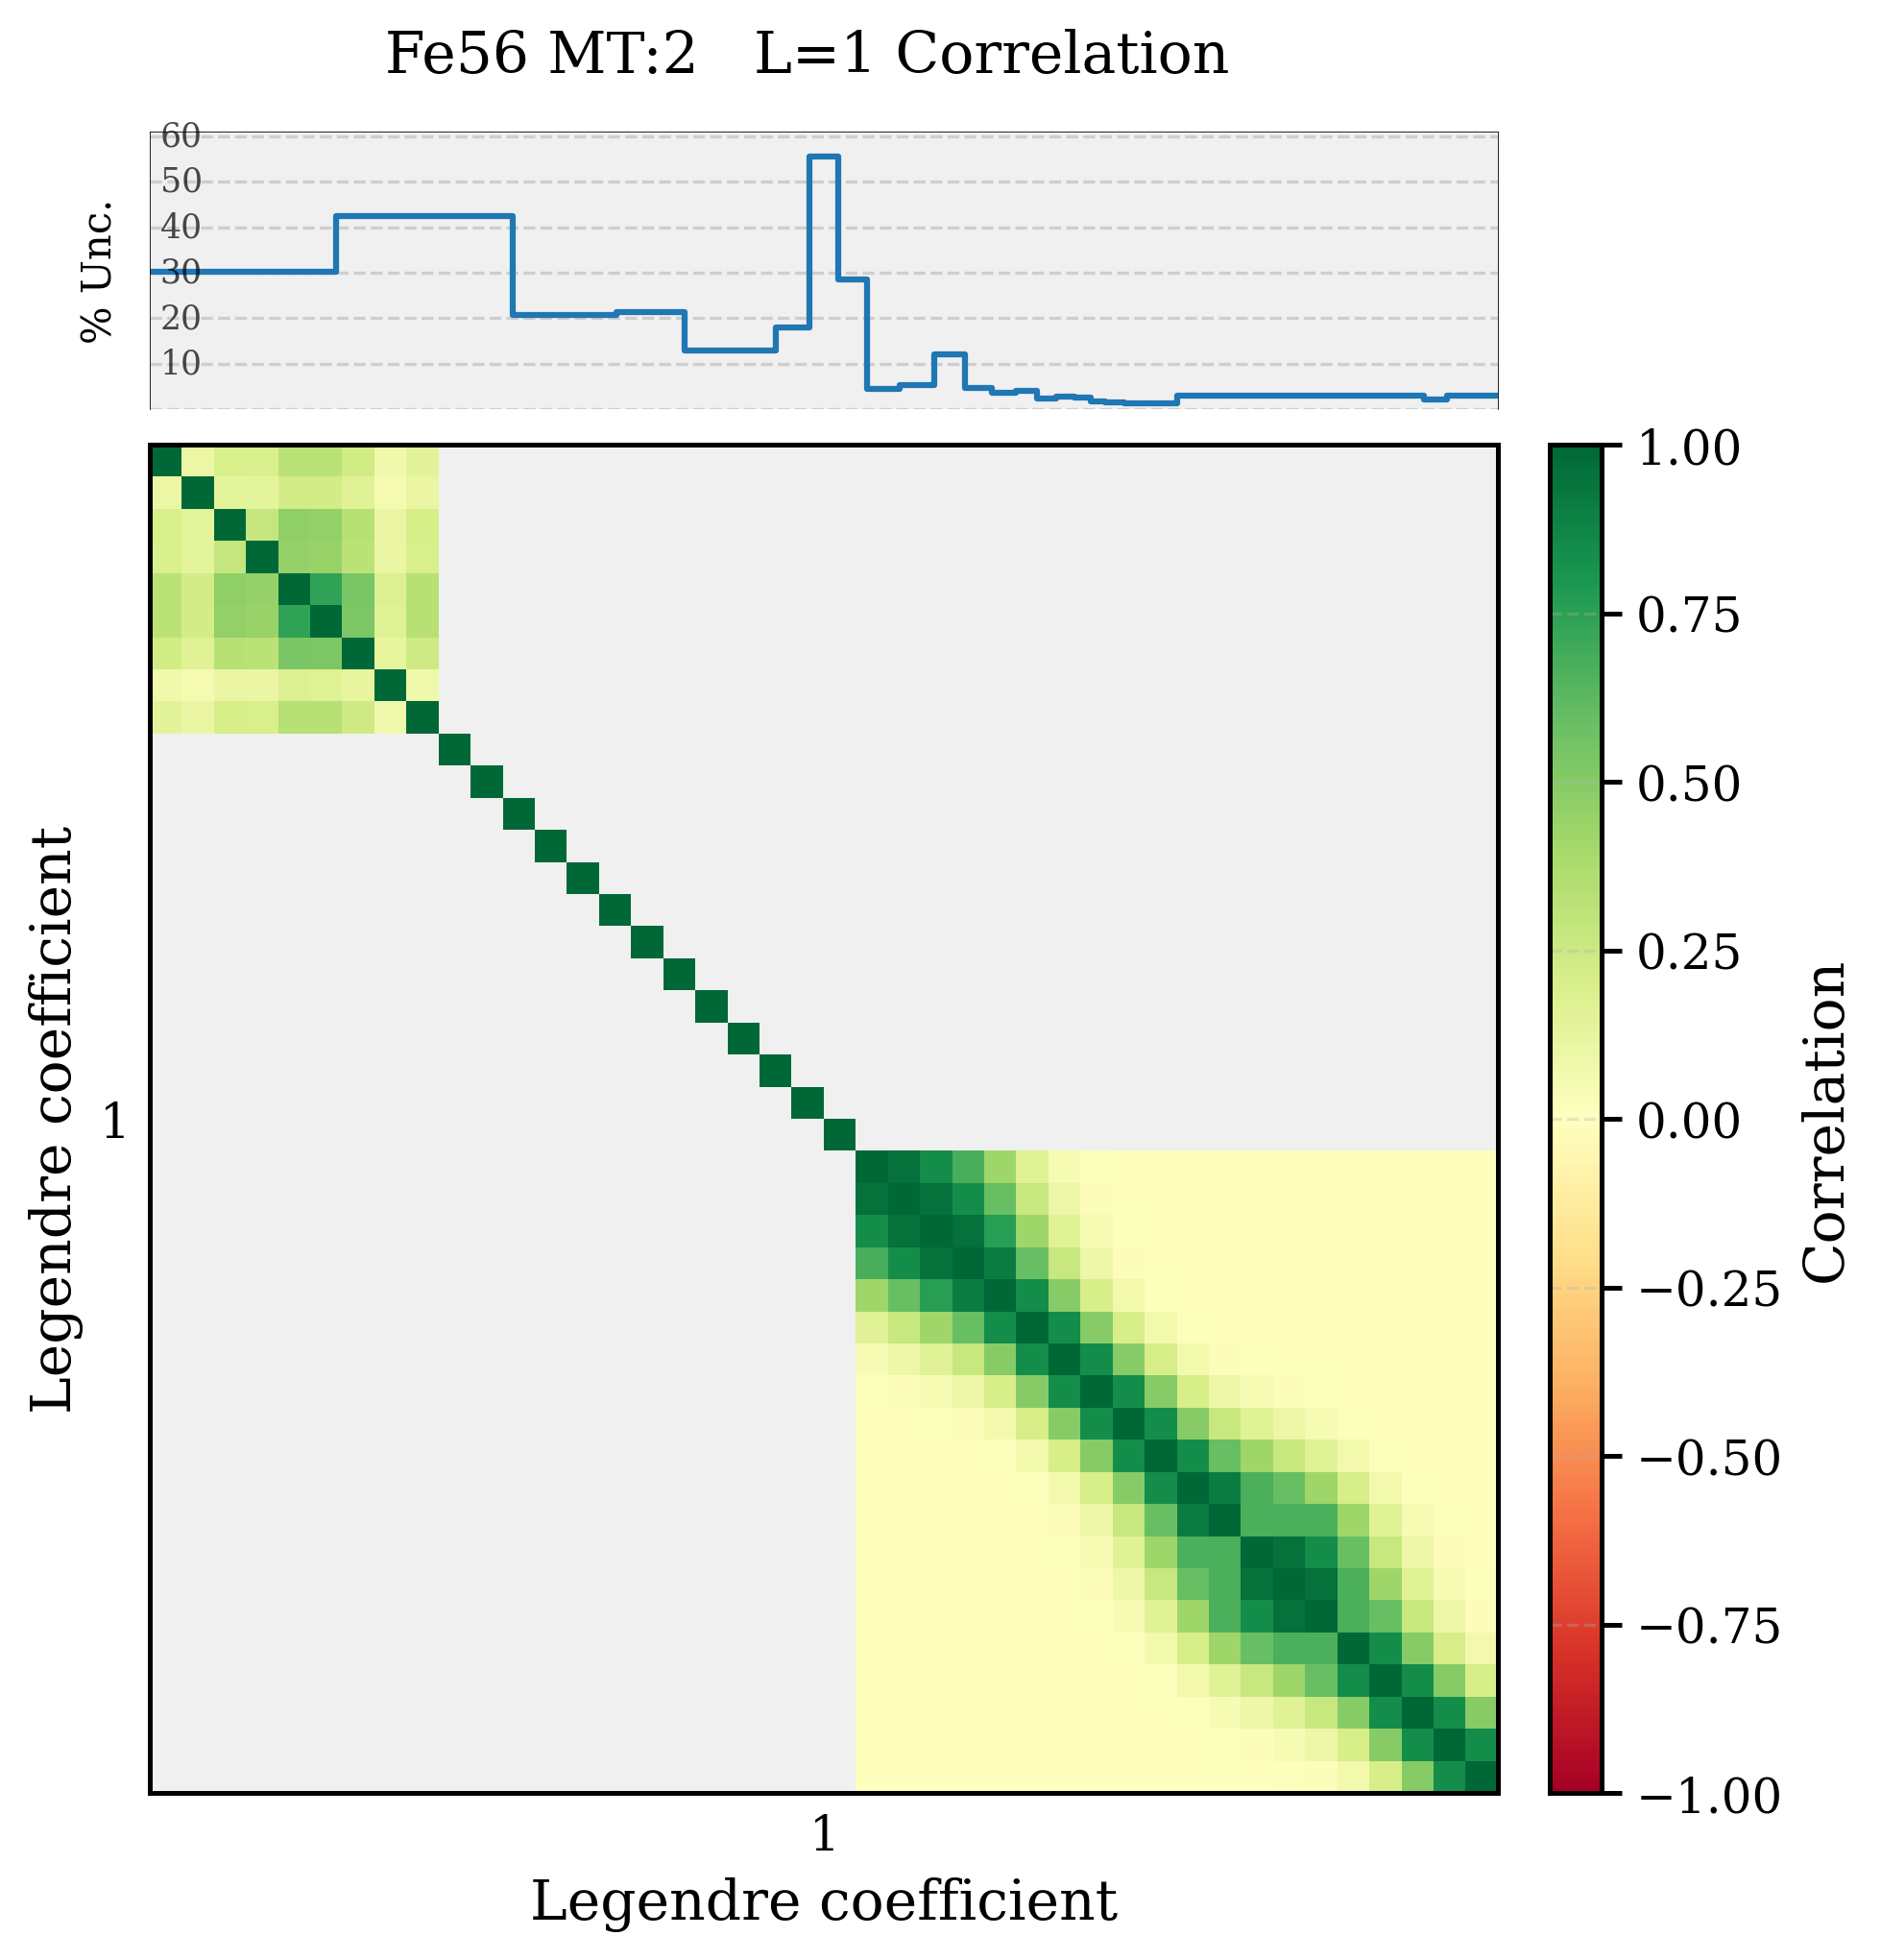

In [ ]:
cov.plot_covariance_heatmap(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
    matrix_type="corr",
    show_uncertainties=True
);


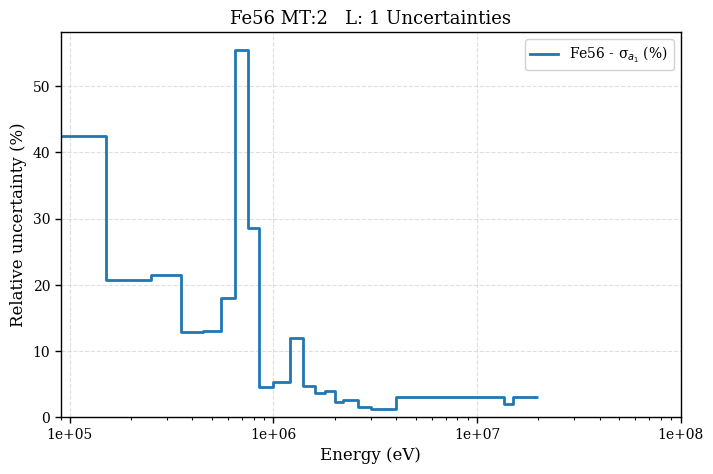

In [ ]:
cov.plot_uncertainties(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
    energy_range=(9e4, 1e8),
);


In [ ]:
mg_cov = MF34_to_MG(
        endf_object=jeff_endf,
        energy_grid=SCALE56,
        weighting_function="constant",
        isotope=26056,  
        mt=2           
    )

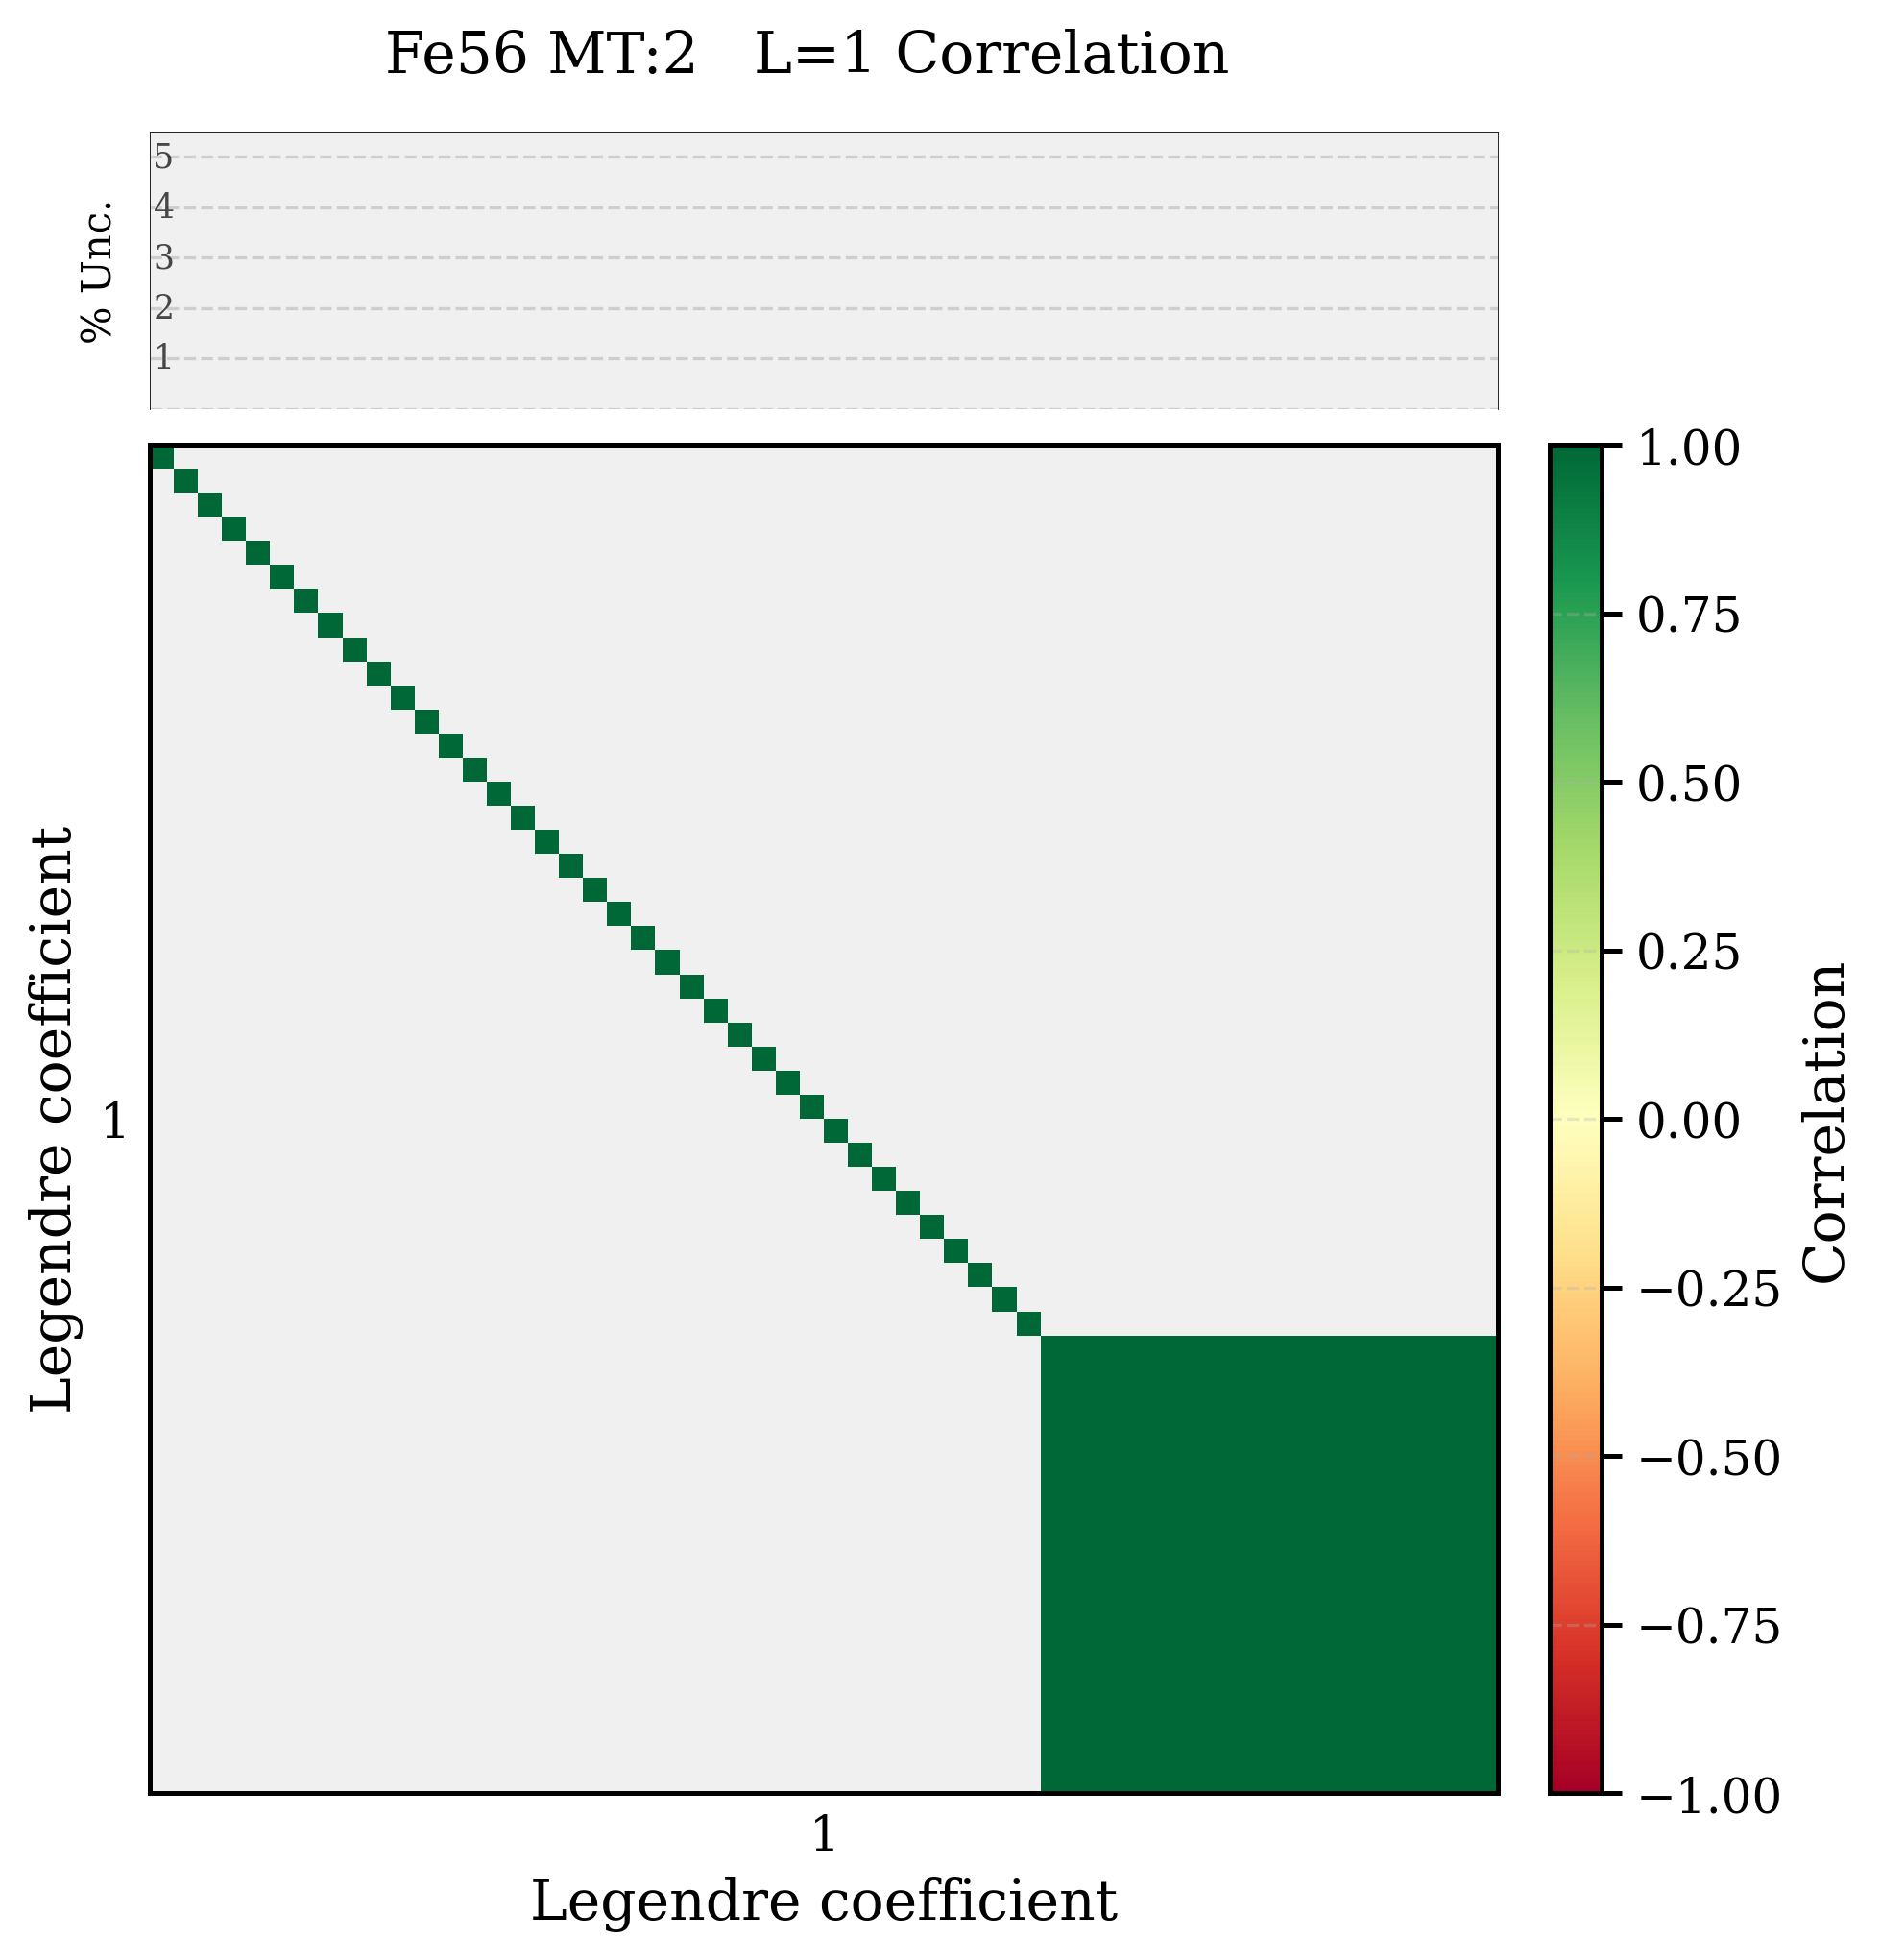

In [19]:
mg_cov.plot_covariance_heatmap(
    isotope=26056,
    mt=2,
    legendre_coeffs=[1],
    matrix_type="corr",
    show_uncertainties=True
)

In [ ]:
mg_cov.to_dataframe()

,ISO_H,REAC_H,L_H,ISO_V,REAC_V,L_V,ENE,STD
0,26056,2,1,26056,2,1,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
1,26056,2,1,26056,2,2,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
2,26056,2,1,26056,2,3,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
3,26056,2,1,26056,2,4,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
4,26056,2,1,26056,2,5,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
5,26056,2,1,26056,2,6,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
6,26056,2,2,26056,2,2,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
7,26056,2,2,26056,2,3,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
8,26056,2,2,26056,2,4,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
9,26056,2,2,26056,2,5,"[1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."


In [15]:
import numpy as np

# Examine the results in detail
print("Detailed examination of multigroup results:")
print(f"Energy group edges: {mg_cov.energy_group_edges}")
print(f"Number of groups: {mg_cov.num_groups}")

# Look at the first matrix (L=1, L=1 diagonal block)
print(f"\nFirst matrix shape: {mg_cov.relative_matrices[0].shape}")
print(f"Relative matrix (L=1, L=1):")
print(mg_cov.relative_matrices[0])

print(f"\nCorresponding MG means for L=1:")
print(f"Row means: {mg_cov.mg_means_row[0]}")
print(f"Col means: {mg_cov.mg_means_col[0]}")

print(f"\nAbsolute matrix (L=1, L=1):")
print(mg_cov.absolute_matrices[0])

# Check for non-zero values
relative_non_zero = np.any(~np.isnan(mg_cov.relative_matrices[0]))
absolute_non_zero = np.any(mg_cov.absolute_matrices[0] != 0)
print(f"\nRelative matrix has non-NaN values: {relative_non_zero}")
print(f"Absolute matrix has non-zero values: {absolute_non_zero}")

# Test some specific values
print(f"\nDiagonal of relative matrix: {np.diag(mg_cov.relative_matrices[0])}")
print(f"Diagonal of absolute matrix: {np.diag(mg_cov.absolute_matrices[0])}")

# Test performance with a larger grid
print(f"\n\nTesting with VITAMINJ174 grid (174 groups)...")
import time
start_time = time.time()

try:
    mg_cov_full = MF34_to_MG(
        endf_object=jeff_endf,
        energy_grid="VITAMINJ174",
        weighting_function="constant",
        isotope=26056,
        mt=2,
        max_legendre_order=6  # Limit to avoid too much computation
    )
    end_time = time.time()
    print(f"Full grid conversion successful in {end_time - start_time:.2f} seconds")
    print(f"Result: {mg_cov_full.num_groups} groups, {mg_cov_full.num_matrices} matrices")
except Exception as e:
    end_time = time.time()
    print(f"Error with full grid after {end_time - start_time:.2f} seconds: {e}")

Detailed examination of multigroup results:
Energy group edges: [1.000e-11 4.000e-09 1.000e-08 2.530e-08 4.000e-08 5.000e-08 6.000e-08
 8.000e-08 1.000e-07 1.500e-07 2.000e-07 2.500e-07 3.250e-07 3.500e-07
 3.750e-07 4.500e-07 6.250e-07 1.010e-06 1.080e-06 1.130e-06 5.000e-06
 6.250e-06 6.500e-06 6.875e-06 7.000e-06 2.050e-05 2.120e-05 2.175e-05
 3.600e-05 3.713e-05 6.500e-05 6.750e-05 1.012e-04 1.050e-04 1.160e-04
 1.175e-04 1.877e-04 1.915e-04 2.250e-03 3.740e-03 1.700e-02 2.000e-02
 5.000e-02 2.000e-01 2.700e-01 3.300e-01 4.700e-01 6.000e-01 7.500e-01
 8.611e-01 1.200e+00 1.500e+00 1.850e+00 3.000e+00 4.304e+00 6.434e+00
 2.000e+01]
Number of groups: 56

First matrix shape: (56, 56)
Relative matrix (L=1, L=1):
[[    nan     nan     nan ...     nan     nan     nan]
 [    nan     nan     nan ...     nan     nan     nan]
 [    nan     nan     nan ...     nan     nan     nan]
 ...
 [    nan     nan     nan ... 0.09072 0.09072 0.09072]
 [    nan     nan     nan ... 0.09072 0.09072 0.0907

In [16]:
# Test the updated to_dataframe method with MF34CovMat-like format
print("Testing the updated to_dataframe method:")

# Re-import the updated module
import importlib
import mcnpy.cov.mg_mf34_covmat
importlib.reload(mcnpy.cov.mg_mf34_covmat)
from mcnpy.cov.mg_mf34_covmat import MGMF34CovMat

# Recreate the mg_cov object to get the updated class
mg_cov = MF34_to_MG(
    endf_object=jeff_endf,
    energy_grid=SCALE56,
    weighting_function="constant",
    isotope=26056,  
    mt=2           
)

# Test the new to_dataframe method
df = mg_cov.to_dataframe()
print(f"Updated DataFrame shape: {df.shape}")
print("\nDataFrame columns:")
print(df.columns.tolist())
print("\nFirst row:")
print(df.iloc[0])

# Compare with original MF34CovMat DataFrame format
print(f"\nComparison with MF34CovMat format:")
original_df = cov.to_dataframe()
print(f"Original MF34CovMat columns: {original_df.columns.tolist()}")
print(f"New MGMF34CovMat columns: {df.columns.tolist()}")
print(f"Columns match: {list(original_df.columns) == list(df.columns)}")

Testing the updated to_dataframe method:
Updated DataFrame shape: (21, 8)

DataFrame columns:
['ISO_H', 'REAC_H', 'L_H', 'ISO_V', 'REAC_V', 'L_V', 'ENE', 'STD']

First row:
ISO_H                                                 26056
REAC_H                                                    2
L_H                                                       1
ISO_V                                                 26056
REAC_V                                                    2
L_V                                                       1
ENE       [1e-11, 4e-09, 1e-08, 2.53e-08, 4e-08, 5e-08, ...
STD       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...
Name: 0, dtype: object

Comparison with MF34CovMat format:
Original MF34CovMat columns: ['ISO_H', 'REAC_H', 'L_H', 'ISO_V', 'REAC_V', 'L_V', 'ENE', 'STD']
New MGMF34CovMat columns: ['ISO_H', 'REAC_H', 'L_H', 'ISO_V', 'REAC_V', 'L_V', 'ENE', 'STD']
Columns match: True
